# Task - 2 Intermediate Level Task

# Prediction using Decision Tree  Algorithm 

Create the Decision Tree classifier and visualize it graphically. 

The purpose is if we feed any new data to this classifier, it would be able to  predict the right class accordingly.  

Dataset : https://bit.ly/3kXTdox


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("./iris.csv")

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
df = df.drop(['Id'],axis=1)

In [6]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
df['Species']=df['Species'].map({'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3})

In [9]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [10]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

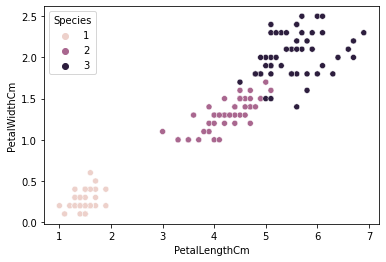

In [11]:
sns.scatterplot(data=x,x='PetalLengthCm',y='PetalWidthCm',hue=y)
plt.show()

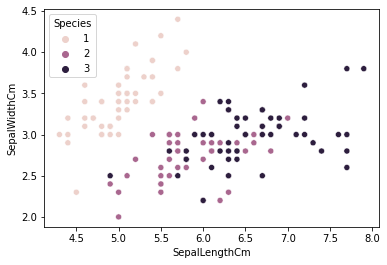

In [12]:
sns.scatterplot(data=x,x='SepalLengthCm',y='SepalWidthCm',hue=y)
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=0)

In [14]:
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier(max_depth=3,random_state =0)

In [15]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [16]:
y_pred = dtc.predict(x_test)

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  1,  5]], dtype=int64)

In [18]:
accuracy_score(y_test, y_pred)

0.9666666666666667

In [19]:
import graphviz
from sklearn.tree import plot_tree

[Text(523.125, 951.3000000000001, 'PetalWidthCm <= 0.8\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]\nclass = Iris-virginica'),
 Text(348.75, 679.5, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]\nclass = Iris-setosa'),
 Text(697.5, 679.5, 'PetalWidthCm <= 1.75\ngini = 0.496\nsamples = 81\nvalue = [0, 37, 44]\nclass = Iris-virginica'),
 Text(348.75, 407.70000000000005, 'PetalLengthCm <= 4.95\ngini = 0.18\nsamples = 40\nvalue = [0, 36, 4]\nclass = Iris-versicolor'),
 Text(174.375, 135.89999999999998, 'gini = 0.056\nsamples = 35\nvalue = [0, 34, 1]\nclass = Iris-versicolor'),
 Text(523.125, 135.89999999999998, 'gini = 0.48\nsamples = 5\nvalue = [0, 2, 3]\nclass = Iris-virginica'),
 Text(1046.25, 407.70000000000005, 'PetalLengthCm <= 4.85\ngini = 0.048\nsamples = 41\nvalue = [0, 1, 40]\nclass = Iris-virginica'),
 Text(871.875, 135.89999999999998, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = Iris-versicolor'),
 Text(1220.625, 135.89999999999998, 'gini = 0.0\nsamples = 39\nvalue

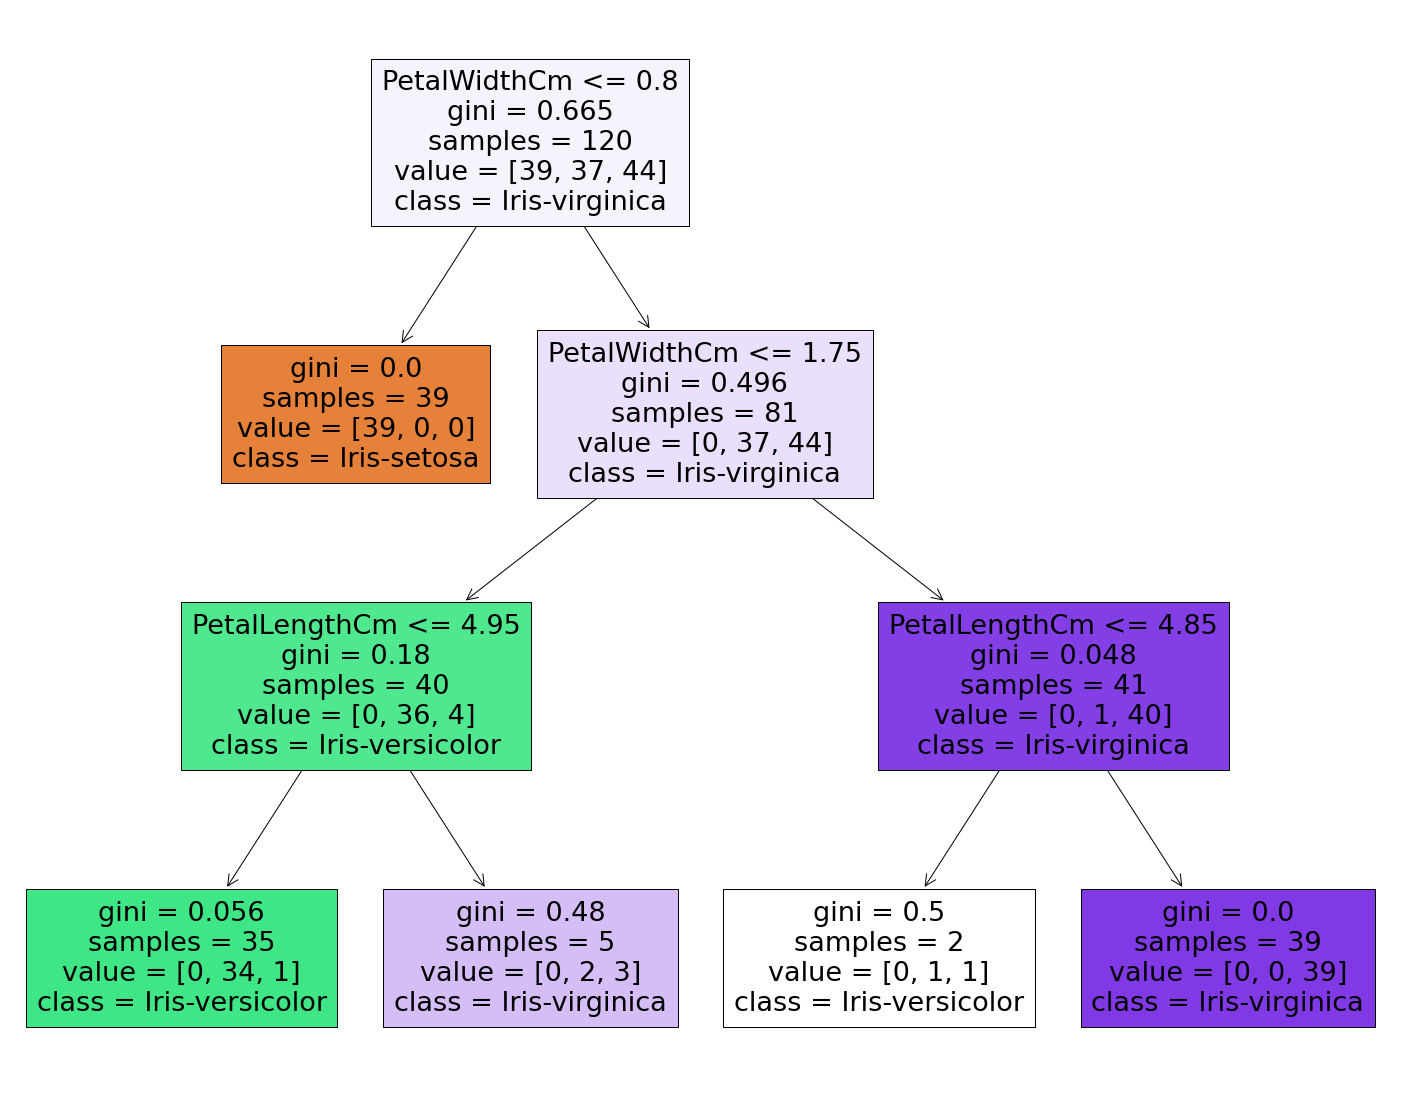

In [20]:
fig = plt.figure(figsize=(25,20))
plot_tree(dtc,feature_names=x.columns,  
                   class_names=['Iris-setosa','Iris-versicolor','Iris-virginica'],
                   filled=True)